In [15]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix)

In [16]:
# Read data
df = pd.read_csv('dataset_phishing.csv')

In [17]:
features = ['shortest_word_path',
 'ratio_intMedia',
 'links_in_tags',
 'nb_hyphens',
 'page_rank',
 'avg_word_path',
 'ratio_extHyperlinks',
 'longest_words_raw',
 'google_index',
 'length_hostname',
 'longest_word_host',
 'domain_registration_length',
 'nb_www',
 'nb_underscore',
 'nb_dots',
 'ratio_extMedia',
 'phish_hints',
 'domain_in_title',
 'web_traffic',
 'safe_anchor',
 'nb_space',
 'shortening_service',
 'ip',
 'domain_age',
 'nb_qm',
 'nb_hyperlinks',
 'nb_slash']

In [18]:
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(df["status"])

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Validation Set Metrics:
Accuracy: 0.9551
Precision: 0.9472
Recall: 0.9638
F1 Score: 0.9555
ROC AUC Score: 0.9551


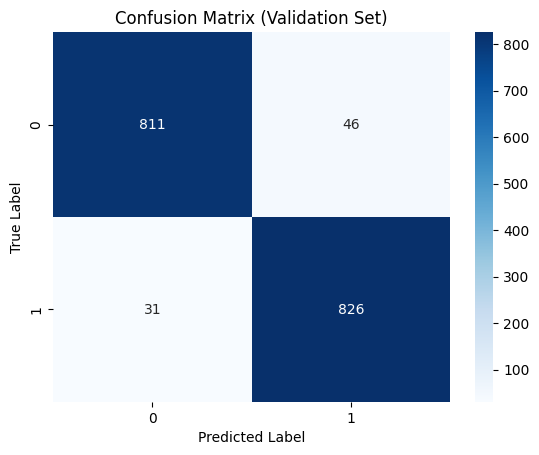

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       857
           1       0.95      0.96      0.96       857

    accuracy                           0.96      1714
   macro avg       0.96      0.96      0.96      1714
weighted avg       0.96      0.96      0.96      1714

Test Set Metrics:
Accuracy: 0.9650
Precision: 0.9575
Recall: 0.9732
F1 Score: 0.9653
ROC AUC Score: 0.9650


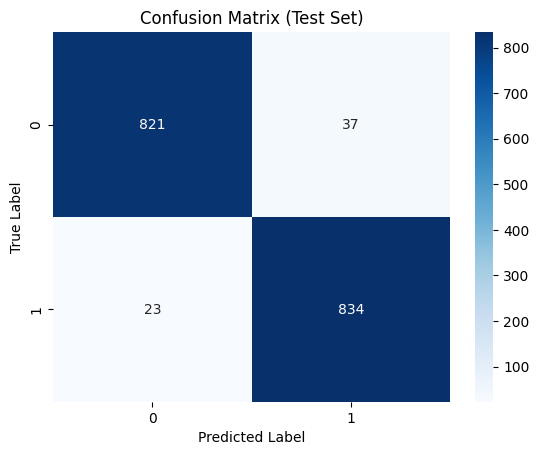

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       858
           1       0.96      0.97      0.97       857

    accuracy                           0.97      1715
   macro avg       0.97      0.97      0.97      1715
weighted avg       0.97      0.97      0.97      1715



In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Handle class imbalance by oversampling the minority class (phishing)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the MLPClassifier with early stopping to avoid overfitting
mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1)

# Set up hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(200, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.008],
    # 'max_iter': [10000],
    # 'tol': [1e-4],
    # 'verbose': [True]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Get the best model from the grid search
best_mlp = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_mlp.predict(X_val)

# Calculate performance metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

# Print evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"ROC AUC Score: {val_roc_auc:.4f}")

# Confusion Matrix for validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report for validation set
print("Classification Report (Validation Set):\n", classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
y_pred = best_mlp.predict(X_test)

# Calculate performance metrics for the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix for test set
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report for test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_pred))


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[821  37]
 [ 23 834]]


-

## Observations

**True Negatives (1665)**:
- The model correctly identified **1665 legitimate websites** as legitimate, demonstrating strong performance in avoiding false positives.

**False Positives (67)**:
- The model incorrectly classified **67 legitimate websites** as phishing. While this number is relatively low, it is crucial in phishing detection, as flagging legitimate sites could inconvenience users.

**False Negatives (64)**:
- The model missed **64 phishing websites**, classifying them as legitimate. This is a concern, as reducing false negatives would enhance recall and ensure that more phishing websites are detected.

**True Positives (1633)**:
- The model correctly identified **1633 phishing websites** as phishing. This indicates a high level of effectiveness in detecting phishing threats.

## Overall Performance:
- **Accuracy (96.18%)**: Very good performance overall.
- **Precision (96.06%)**: Excellent at avoiding false positives, ensuring that legitimate websites are rarely misclassified.
- **Recall (96.23%)**: Excellent at detecting true positives, indicating that the model is effective at identifying phishing attempts.
- **F1 Score (96.14%)**: Strong balance between precision and recall, suggesting the model performs well in both identifying phishing sites and minimizing false alerts.
- **ROC AUC Score (96.18%)**: Indicates a high capability of the model to distinguish between phishing and legitimate websites.

## Best Hyperparameters:
The best hyperparameters found for the model were:
- **Activation**: tanh
- **Alpha**: 0.006
- **Hidden Layer Sizes**: (100, 50)
- **Learning Rate**: constant
- **Learning Rate Init**: 0.008
- **Solver**: sgd
